In [ ]:
%load_ext autoreload
%autoreload 2
#%reload_ext autoreload
import spacy
from spacy import displacy
import random
import matplotlib.pyplot as plt
import numpy
from collections import Counter
from proseflow.text import *
import os
from proseflow.load import load

In [ ]:
nlp = load("en_core_sci_lg")
def chunks(doc): return [chunk for chunk in doc.noun_chunks]

{'re': '(zh|da|nl|en|fr|de|el|it|ja|lt|nb|pl|pt|ro|es|xx)[_(core|ent|ner)_(web|news|wiki|sci|craft|jnlpba|bc5cdr|bionlp13cg)_(sm|md|lg)]*$'} shape {}
Loading SpaCy...

✘ No compatible model found for 'en_core_sci_lg' (spaCy v2.3.5).

Download the SpaCy model before trying to import it.


In [ ]:
from proseflow.datasethelpers import GNBR #get_data_and_distributions, parse_dep_path, clean_and_parse

In [ ]:
#distributions, data = GNBR_prep()
DIR_PATH = "../data/gnbr/"

"../data/gnbr/"
data = GNBR.get_data_and_distributions(DIR_PATH+"part-ii-dependency-paths-chemical-gene-sorted-with-themes.txt")
distributions = GNBR.get_distributions(DIR_PATH + "part-i-chemical-gene-path-theme-distributions.txt")

['2.000000', '0', '0.000000', '0', '0.000000', '0', '0.000000', '0', '0.000000', '0', '0.000000', '0', '0.000000', '0', '2.000000', '0', '0.000000', '0', '0.000000', '0'] headers 
                            chemical-gene
                    (A+) agonism, activation
                    (A-) antagonism, blocking
                    (B) binding, ligand (esp. receptors)
                    (E+) increases expression/production
                    (E-) decreases expression/production
                    (E) affects expression/production (neutral)
                    (N) inhibits
                            


In [ ]:
lines = get_data_and_distributions(DIR_PATH + "part-i-chemical-gene-path-theme-distributions.txt")

In [ ]:
lines["kinases|compound|start_entity participate|nsubj|kinases participate|nmod|end_entity"]

[2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
path = lines[1].strip().split("\t")[0]
support = [float(val) for val in lines[1].strip().split("\t")[1:]]
support

[2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
lines[0]

['A+',
 'A+.ind',
 'A-',
 'A-.ind',
 'B',
 'B.ind',
 'E+',
 'E+.ind',
 'E-',
 'E-.ind',
 'E',
 'E.ind',
 'N',
 'N.ind',
 'O',
 'O.ind',
 'K',
 'K.ind',
 'Z',
 'Z.ind']

In [ ]:
lines[1].strip().split("\t")[1:]

['2.000000',
 '0',
 '0.000000',
 '0',
 '0.000000',
 '0',
 '0.000000',
 '0',
 '0.000000',
 '0',
 '0.000000',
 '0',
 '0.000000',
 '0',
 '2.000000',
 '0',
 '0.000000',
 '0',
 '0.000000',
 '0']

In [ ]:
data[:2]

[{'pmid': '25640386',
  'sent': 'Similarly 18F-FDG-PET/CT had higher sensitivity and specificity in hormone_receptor -LRB- + -RRB- and -LRB- - -RRB- groups .',
  'ent1': '-',
  'ent1_offset': '1624,1625',
  'ent2': 'hormone_receptor',
  'ent2_offset': '1598,1614',
  'ent1_raw': '-',
  'ent2_raw': 'hormone receptor',
  'ent1_canonical': 'null',
  'ent2_canonical': '3164',
  'ent1_type': 'Chemical',
  'ent2_type': 'Gene',
  'dep': 'sensitivity|appos|START_ENTITY sensitivity|nmod|END_ENTITY'},
 {'pmid': '28560459',
  'sent': 'The purpose of the present study was to investigate the protective effect of the -1 receptor -LRB- Sig-1R -RRB- agonist -LRB- + -RRB- - pentazocin -LRB- PTZ -RRB- on pressure-induced apoptosis and death of human trabecular meshwork cells -LRB- hTMCs -RRB- .',
  'ent1': '+',
  'ent1_offset': '244,245',
  'ent2': 'Sig-1R',
  'ent2_offset': '227,233',
  'ent1_raw': '+',
  'ent2_raw': 'Sig-1R',
  'ent1_canonical': 'null',
  'ent2_canonical': '10280',
  'ent1_type': 'Chem

In [ ]:
counter = Counter()
path_lengths = Counter()

for dep, values in distributions.items():
    counter[dep] = sum(list(values.values()))
    length = len(dep.split(" "))
    path_lengths[length] += 1

counter_data = Counter()

for d in data:
    counter_data[d["dep"].lower()] += 1
for k,v in counter.most_common(20):
    print(k, "\t\t\t\t", v)

synthase|compound|start_entity synthase|appos|end_entity 				 42838.0
synthase|amod|start_entity synthase|appos|end_entity 				 26958.0
transporter|compound|start_entity transporter|appos|end_entity 				 16141.0
receptor|amod|start_entity receptor|appos|end_entity 				 9666.0
gene|amod|start_entity gene|appos|end_entity 				 7785.0
transporter|compound|start_entity transporter|compound|end_entity 				 6771.0
protein|amod|start_entity protein|appos|end_entity 				 5886.0
transporter|amod|start_entity transporter|appos|end_entity 				 5486.0
receptor|compound|start_entity receptor|appos|end_entity 				 5233.0
channel|compound|start_entity channel|amod|end_entity 				 4195.0
channel|compound|start_entity channel|appos|end_entity 				 4074.0
protein|compound|start_entity protein|appos|end_entity 				 4048.0
expression|amod|start_entity expression|appos|end_entity 				 3784.0
channel|compound|start_entity channel|compound|end_entity 				 3591.0
gene|compound|start_entity gene|appos|end_enti

In [ ]:
for d in data[:4]:
    print()
    print(d["dep"])
    print("Entity 1: ", d["ent1"] , d["ent1_raw"])
    print("Entity 2: ", d["ent2"] , d["ent2_raw"])
    print(d["sent"])


sensitivity|appos|START_ENTITY sensitivity|nmod|END_ENTITY
Entity 1:  - -
Entity 2:  hormone_receptor hormone receptor
Similarly 18F-FDG-PET/CT had higher sensitivity and specificity in hormone_receptor -LRB- + -RRB- and -LRB- - -RRB- groups .

agonist|appos|START_ENTITY agonist|compound|receptor receptor|appos|END_ENTITY
Entity 1:  + +
Entity 2:  Sig-1R Sig-1R
The purpose of the present study was to investigate the protective effect of the -1 receptor -LRB- Sig-1R -RRB- agonist -LRB- + -RRB- - pentazocin -LRB- PTZ -RRB- on pressure-induced apoptosis and death of human trabecular meshwork cells -LRB- hTMCs -RRB- .

inhibition|dep|START_ENTITY inhibition|amod|END_ENTITY
Entity 1:  0,0-diethyl_0-4-nitrophenyl_phosphate 0,0-diethyl 0-4-nitrophenyl phosphate
Entity 2:  cholinesterase cholinesterase
It decreased by 51 % cholinesterase inhibition in the brain caused by i.p. injection of 2 mg of parathion/kg body weight but not that of an equitoxic dose -LRB- 0.5 mg/kg -RRB- of its active me

In [ ]:
SS = GNBR.strongest_support(distributions)
PC = GNBR.path_count(data)

Counting 1728361 dependency paths


In [ ]:
distributions['treatment|nmod|start_entity caused|nsubj|treatment caused|nmod|activity activity|amod|end_entity']

{'2.000000': 0.0, '0': 0.0, '0.000000': 0.0}

In [ ]:
PL = GNBR.path_lengths(distributions)


In [ ]:
SS

Counter({'treatment|nmod|start_entity caused|nsubj|treatment caused|nmod|activity activity|amod|end_entity': 0.0,
         'synthesis|nmod|start_entity analogues|nsubj|synthesis analogues|nmod|modulators modulators|nmod|activity activity|compound|end_entity': 0.0,
         'phosphate|amod|start_entity hydrolysis|nmod|phosphate catalyzes|dobj|hydrolysis catalyzes|nsubj|reticulum reticulum|amod|end_entity': 0.0,
         'inhibitor|nummod|start_entity induced|nsubj|inhibitor induced|advcl|indicating indicating|ccomp|protected protected|nsubj|end_entity': 0.0,
         'levels|compound|start_entity response|nmod|levels correlated|nsubjpass|response correlated|nmod|end_entity': 0.0,
         'glucose-6-phosphate|nmod|start_entity utilization|amod|glucose-6-phosphate dephosphorylation|nmod|utilization catalyzes|dobj|dephosphorylation catalyzes|nsubj|end_entity': 0.0,
         'sensitivity|amod|start_entity activity|appos|sensitivity led|nsubj|activity led|nmod|analysis analysis|acl|demonstr

In [ ]:
valid = GNBR.valid_patterns(distributions)

KeyboardInterrupt: 

In [ ]:
#most common patterns from distribution file
for k,v in SS.most_common(20):
    print(k, "\t\t\t\t", v)

In [ ]:
#most common patterns from the data file
for k,v in PC.most_common(20):
    print(k, "\t\t\t\t", v)

In [ ]:
#frequencies for dependency paths with certain length
for length, freq in PL.items():
    print(f"{freq} paths with length {length}")

In [ ]:
values = sorted(list(PC.values()), reverse=True)
total = sum(values) #allpaths .. == len(data)
normalised = [x/total for x in values]
plt.plot(numpy.cumsum(normalised))
plt.show()


for k in [10, 100, 1000, 10000, 100000, 500000]:
    topk_patterns = {x[0] for x in PC.most_common(k)}
    topk_data = [x for x in data if x["dep"].lower() in topk_patterns]

    print(f"Top {k} patterns by freq account for {len(topk_data)/len(data) * 100} % of the data.")

In [ ]:
#Do depenendcy tags line up with spacy?
# Check all of the possible dependency labels:

spacy_deps = {'ROOT', 'acl', 'acl:relcl','advcl','advmod','amod','appos','aux','auxpass','case','cc','cc:preconj','ccomp',
              'compound','compound:prt','conj','cop','csubj','csubjpass','dep','det','det:predet','dobj','expl','iobj','list',
              'mark','mwe','neg','nmod','nmod:npmod','nmod:poss','nmod:tmod','nsubj','nsubjpass','nummod','parataxis','punct','xcomp'}


dependencies = set()
for path in distributions.keys():
    triples = path.split(" ")
    for triple in triples:
        head, rel, tail = triple.split("|")
        dependencies.add(rel)
        
print("In both")
print(dependencies.intersection(spacy_deps))

print("In dep paths but not spacy")
print(dependencies.difference(spacy_deps))

print("In spacy but not dep paths")
print(spacy_deps.difference(dependencies))

# Conclusion:
# Need to fix: 
# 'nsubj:xsubj', 'nsubjpass:xsubj' => 'nsubj', 'nsubjpass'


In [ ]:
from scify.V import V
example = "prevented|nsubj|START_ENTITY prevented|dobj|release release|nmod|END_ENTITY"
sent = "The ICE inhibitor Z-YVAD-FMK prevented the release of IL-1beta evoked by DNFB ."

# rules are of the form: A | governs (via relation) | B
# So for semregex we need A > B OR B < A, which might be better as spacy t.dep_ refers to the word's parent.

#  For this subtree, it looks like:
#                prevented
#       start_ent           release
#                                   end_entity

pattern = [
    {"SPEC": {"NODE_NAME": "prevented"}, "PATTERN": {"ORTH": "prevented"}},
    {"SPEC": {"NODE_NAME": "start_entity", "NBOR_RELOP": ">", "NBOR_NAME": "prevented"}, "PATTERN": {"DEP": "nsubj"}},
    {"SPEC": {"NODE_NAME": "release", "NBOR_RELOP": ">", "NBOR_NAME": "prevented"}, "PATTERN": {"DEP": "dobj", "ORTH":"release"}},
    {"SPEC": {"NODE_NAME": "end_entity", "NBOR_RELOP": ">", "NBOR_NAME": "release"}, "PATTERN": {"DEP": "nmod"}},
]

doc = nlp(sent)
V.doc(doc)
rules = [rule.split("|") for rule in example.split(" ")]
print(rules)
print()

In [ ]:
constructed_pattern = construct_pattern(rules)
matcher = DependencyMatcher(nlp.vocab)

matcher.add("pattern1", None, constructed_pattern)

matches = matcher(doc)
print(matches)
subtree = matches[0][1][0]

V.subtrees(doc, subtree)

found 6901 matches (34.505 %)
Found 3248 patterns of length 2
Found 2092 patterns of length 3
Found 894 patterns of length 4
Found 192 patterns of length 6
Found 358 patterns of length 5
Found 83 patterns of length 7
Found 23 patterns of length 8
Found 2 patterns of length 11
Found 2 patterns of length 10
Found 6 patterns of length 9
Found 1 patterns of length 13
Found 3580 unique patterns

Top found patterns by freq:
domain|compound|start_entity domain|nmod|end_entity 			 157
inhibitor|appos|start_entity inhibitor|compound|end_entity 			 155
fingers|compound|start_entity fingers|nmod|end_entity 			 117
protein|compound|start_entity protein|nsubj|end_entity 			 115
factor|compound|start_entity factor|nsubj|end_entity 			 104
finger|compound|start_entity finger|nmod|end_entity 			 92
protein|compound|start_entity protein|appos|end_entity 			 67
gene|compound|start_entity gene|appos|end_entity 			 67
dismutase|compound|start_entity dismutase|appos|end_entity 			 62
finger|compound|start_

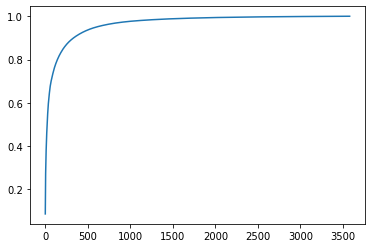

In [ ]:

from spacy.tokens import Doc
# from scispacy.util import WhitespaceTokenizer

# nlp.tokenizer = WhitespaceTokenizer(nlp.vocab)

found = 0
pattern_lengths = defaultdict(int)
good_patterns = Counter()
examples = 20000
for d in data[-examples:]:
    subtree = GNBR.parse_dep_path(d["dep"])
    
    pattern = construct_pattern(subtree)
    
    if pattern is None:
        continue
        
    doc = GNBR.clean_and_parse(d["sent"], nlp)
    
    matcher = DependencyMatcher(nlp.vocab)
    matcher.add("pattern1", None, pattern)

    matches = matcher(doc)
               
    match = matches[0]
    if match[1]:
        found +=1
        pattern_lengths[len(subtree)] +=1
        good_patterns[d["dep"].lower()] +=1

print(f"found {found} matches ({found/examples  * 100} %)")
for k,v in pattern_lengths.items():
    print(f"Found {v} patterns of length {k}")
    
print(f"Found {len(good_patterns)} unique patterns")

print()
print("Top found patterns by freq:")
for k,v in good_patterns.most_common(50):
    print(k, "\t\t\t", v)

values = sorted([counter[p] for p in good_patterns.keys()], reverse=True)
#250 patterns are 90% of 7000 matches
total = sum(values)
normalised = [x/total for x in values]
plt.plot(numpy.cumsum(normalised))
plt.show()


In [ ]:
#good_patterns[:4]

In [ ]:
44

In [ ]:
import csv

with open('../data/experiments/GNBR_chem_gene_good_patterns_20k.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["dep_path", "occurence_count"])
    for row in [ [k, v] for k,v in good_patterns.items()]:
        writer.writerow(row)

In [ ]:
len({d["dep"].lower() for d in data[-examples:]})
bad_pattern_data = [d for d in data[-examples:] if d["dep"].lower() not in good_patterns]

In [ ]:
data[0]

NameError: name 'data' is not defined

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import random
random.shuffle(bad_pattern_data)
for d in bad_pattern_data[:1000]:
    
    if len(d["sent"].split(" ")) > 15:
        continue
    visualise_doc(GNBR.clean_and_parse(d["sent"], nlp))
    print(d["dep"])
    print("Entity 1: ", d["ent1"] )
    print("Entity 2: ", d["ent2"] )    
    print()
    
# OBSERVATIONS:
# Check why this wasn't picked up
# A recent study T062 using mice T015 carrying a mutation T045 in a specific tyrosine T116 residue of trkB T116 pinpoints a necessary role for the phospholipase-Cgamma -LRB- T116 PLCgamma -RRB- pathway T044 in CREB activation T044 and LTP T042 maintenance T052 .
# residue|compound|START_ENTITY residue|nmod|END_ENTITY
# Entity 1:  tyrosine
# Entity 2:  trkB
#


# acl vs appos
# amods are often annotated as compound nouns - for amod, maybe allow compound IMPORTANT this will fix many examples
# dep => allow any edge, as the parse was wrong

# What happens if we throw away all relations and just use unlabeled edges?
# Some parsing errors come from weird attachments to brackets, what happens if we merge those tokens before using the abbreviation detector
# !!!! What is going wrong with punctuation parsing, should _always_ attach to root 
# ANSWER: dumb, this is because the sentences have line breaks at the end. dumb. This will fix many examples



binding|nmod:npmod|START_ENTITY binding|nmod|structure structure|compound|END_ENTITY
Entity 1:  Zinc
Entity 2:  p53



START_ENTITY|acl:relcl|associated associated|nmod|END_ENTITY
Entity 1:  zinc
Entity 2:  transferrin



START_ENTITY|appos|inhibitor inhibitor|compound|END_ENTITY
Entity 1:  Wortmannin
Entity 2:  PI3-K



inhibitor|appos|START_ENTITY abolished|nmod|inhibitor abolished|nsubjpass|phosphorylation phosphorylation|compound|END_ENTITY
Entity 1:  Wortmannin
Entity 2:  PHAS-I



potentiates|nsubj|START_ENTITY potentiates|dobj|function function|amod|END_ENTITY
Entity 1:  Zinc
Entity 2:  GluK3



treatment|compound|START_ENTITY END_ENTITY|nmod|treatment
Entity 1:  zinc
Entity 2:  HIF-1a



inhibits|nsubj|START_ENTITY inhibits|dobj|angiogenesis angiogenesis|nmod|degradation degradation|nmod|protein protein|compound|END_ENTITY
Entity 1:  Wogonin
Entity 2:  HIF-1a



-RSB-|compound|START_ENTITY -RSB-|amod|END_ENTITY
Entity 1:  zinc
Entity 2:  delta-aminolevulinic_acid_dehydratase



supplies|nmod|START_ENTITY END_ENTITY|acl:relcl|supplies
Entity 1:  zinc
Entity 2:  ZnT-8



blocked|nmod|START_ENTITY blocked|nsubjpass|activation activation|amod|END_ENTITY
Entity 1:  z-DEVD-FMK
Entity 2:  Caspase-3



concentration-dependently|compound|START_ENTITY concentration-dependently|amod|END_ENTITY
Entity 1:  Y-27632
Entity 2:  Rho-kinase



START_ENTITY|nsubj|Effect Effect|nmod|agonist agonist|amod|END_ENTITY
Entity 1:  zinterol
Entity 2:  beta-2



START_ENTITY|nsubj|Effects Effects|nmod|inhibitor inhibitor|compound|END_ENTITY
Entity 1:  zebularine
Entity 2:  DNA_methyltransferase



START_ENTITY|appos|agonist agonist|compound|END_ENTITY
Entity 1:  WY_14643
Entity 2:  PPARalpha



oxidase|amod|START_ENTITY END_ENTITY|appos|oxidase
Entity 1:  xanthine
Entity 2:  adenosine_deaminase



inhibited|nsubj|START_ENTITY inhibited|ccomp|function function|nsubj|END_ENTITY
Entity 1:  Wortmannin
Entity 2:  P-glycoprotein



START_ENTITY|appos|inhibitor inhibitor|amod|END_ENTITY
Entity 1:  zopolrestat
Entity 2:  aldose_reductase



START_ENTITY|nmod|system system|amod|END_ENTITY
Entity 1:  zederone
Entity 2:  cytochrome_P450



fingers|compound|START_ENTITY fingers|amod|END_ENTITY
Entity 1:  Zn
Entity 2:  Nab2



inhibition|nmod|START_ENTITY inhibition|nummod|END_ENTITY
Entity 1:  wortmannin
Entity 2:  PI3K



gene|compound|START_ENTITY expression|nmod|gene END_ENTITY|nsubj|expression
Entity 1:  zinc
Entity 2:  Zfp105



prevented|nsubj|START_ENTITY prevented|nmod|expression expression|amod|END_ENTITY
Entity 1:  zingerone
Entity 2:  PPAR



status|compound|START_ENTITY status|nmod|END_ENTITY
Entity 1:  zinc
Entity 2:  insulin-dependent_diabetes_mellitus



START_ENTITY|appos|inhibitor inhibitor|amod|END_ENTITY
Entity 1:  zileuton
Entity 2:  5-lipoxygenase



inhibitor|nsubj|START_ENTITY inhibitor|amod|END_ENTITY
Entity 1:  XL388
Entity 2:  mammalian_target_of_rapamycin



phosphorylation|nmod|START_ENTITY phosphorylation|compound|END_ENTITY
Entity 1:  Y-27632
Entity 2:  cofilin



absorption|nmod|START_ENTITY responsible|nmod|absorption responsible|nsubj|transporter transporter|amod|END_ENTITY
Entity 1:  zinc
Entity 2:  hZIP4



potently|compound|START_ENTITY inhibits|nsubj|potently inhibits|dobj|END_ENTITY
Entity 1:  wortmannin
Entity 2:  Polo-like_kinase_1



release|amod|START_ENTITY END_ENTITY|nsubj|release
Entity 1:  xenon
Entity 2:  RANTES



induces|nsubj|START_ENTITY induces|dobj|expression expression|nmod|presence presence|nmod|END_ENTITY
Entity 1:  WR1065
Entity 2:  p53



tyrosine|dobj|START_ENTITY tyrosine|nsubj|studies studies|nmod|END_ENTITY
Entity 1:  ZD1839
Entity 2:  epidermal_growth_factor_receptor



upregulates|nsubj|START_ENTITY upregulates|dobj|expression expression|amod|END_ENTITY
Entity 1:  Xg
Entity 2:  syncytin-A



blockade|nmod|START_ENTITY blockade|nummod|END_ENTITY
Entity 1:  XR9576
Entity 2:  MDR1



inhibited|nmod|START_ENTITY inhibited|nsubjpass|activity activity|amod|END_ENTITY
Entity 1:  wortmannin
Entity 2:  Rac1



induction|nmod|START_ENTITY induction|amod|END_ENTITY
Entity 1:  WR-1065
Entity 2:  VEGF-A



START_ENTITY|appos|inhibitor inhibitor|compound|END_ENTITY
Entity 1:  XL413
Entity 2:  CDC7



START_ENTITY|appos|inhibitor inhibitor|compound|END_ENTITY
Entity 1:  XR9051
Entity 2:  P-gp



START_ENTITY|nsubj|production production|nmod|END_ENTITY
Entity 1:  Xanthurenic_acid
Entity 2:  IL-10



bioactivity|nmod|START_ENTITY bioactivity|nsubj|Enhancement Enhancement|nmod|END_ENTITY
Entity 1:  zinc
Entity 2:  growth_hormone



domain|compound|START_ENTITY lacking|dobj|domain END_ENTITY|acl|lacking
Entity 1:  zinc
Entity 2:  ARFGAP2



enhanced|nmod|START_ENTITY enhanced|dobj|expression expression|nmod|mRNA mRNA|amod|END_ENTITY
Entity 1:  zinc
Entity 2:  c-fos



inhibited|nmod|START_ENTITY inhibited|nsubj|translocation translocation|nmod|END_ENTITY
Entity 1:  wortmannin
Entity 2:  GLUT4



precipitation|amod|START_ENTITY precipitation|nmod|END_ENTITY
Entity 1:  Zinc
Entity 2:  plasmin



protein|amod|START_ENTITY END_ENTITY|nsubj|protein
Entity 1:  Zinc
Entity 2:  ZNF202



activated|nsubj|START_ENTITY activated|xcomp|END_ENTITY
Entity 1:  ZGDHu-1
Entity 2:  pro-caspase-3



infusion|amod|START_ENTITY exaggerated|nmod|infusion exaggerated|nsubjpass|response response|compound|END_ENTITY
Entity 1:  xylitol
Entity 2:  insulin



efficacious|nsubj|START_ENTITY efficacious|acl|ligand ligand|nmod|END_ENTITY
Entity 1:  zearalenone
Entity 2:  hPXR



fluorescence|amod|START_ENTITY fluorescence|amod|END_ENTITY
Entity 1:  Zinc
Entity 2:  cytochrome_c



transporter|compound|START_ENTITY transporter|nummod|END_ENTITY
Entity 1:  zinc
Entity 2:  ZIP1



enhanced|nsubj|START_ENTITY enhanced|dobj|activation activation|amod|END_ENTITY
Entity 1:  Wortmannin
Entity 2:  Bad



loss|nmod|START_ENTITY accompanied|dobj|loss accompanied|nsubj|regulation regulation|compound|END_ENTITY
Entity 1:  zinc
Entity 2:  ZIP3



explore|nmod|START_ENTITY explore|dobj|functions functions|nmod|END_ENTITY
Entity 1:  Wy-14643
Entity 2:  PPARa



reverse|nsubj|START_ENTITY reverse|dobj|expression expression|amod|END_ENTITY
Entity 1:  Zebularine
Entity 2:  a-SMA



dynamics|compound|START_ENTITY role|nmod|dynamics role|nmod|secretion secretion|amod|END_ENTITY
Entity 1:  zinc
Entity 2:  growth_hormone



Modulated|nmod|START_ENTITY Modulated|nsubj|Discovery Discovery|nmod|Allosterically Allosterically|compound|END_ENTITY
Entity 1:  Zinc
Entity 2:  GPR39



protein|compound|START_ENTITY encodes|dobj|protein encodes|nsubj|gene gene|amod|END_ENTITY
Entity 1:  zinc
Entity 2:  Zic1



decreased|nmod|START_ENTITY decreased|dobj|susceptibility susceptibility|nmod|END_ENTITY
Entity 1:  XR5118
Entity 2:  PAI-1



inhibitor|acl|START_ENTITY inhibitor|amod|END_ENTITY
Entity 1:  zDEVD
Entity 2:  caspase-3



exerted|nsubj|START_ENTITY exerted|nmod|END_ENTITY
Entity 1:  Ziprasidone
Entity 2:  5-HT2A



complexed|nmod|START_ENTITY complexed|nsubj|structure structure|nmod|END_ENTITY
Entity 1:  zenarestat
Entity 2:  aldose_reductase



possesses|nsubj|START_ENTITY possesses|dobj|property property|amod|END_ENTITY
Entity 1:  Y-25130
Entity 2:  5-HT3_receptor



factor|compound|START_ENTITY END_ENTITY|appos|factor
Entity 1:  zinc
Entity 2:  Snail



treatment|amod|START_ENTITY induced|nmod|treatment induced|nsubjpass|END_ENTITY
Entity 1:  ZnSO4
Entity 2:  PSP94



START_ENTITY|dep|inhibitor inhibitor|compound|END_ENTITY
Entity 1:  Ximelagatran
Entity 2:  thrombin



Implications|nmod|START_ENTITY Implications|amod|binding binding|nmod|END_ENTITY
Entity 1:  zinc
Entity 2:  S100A2



inhibitors|appos|START_ENTITY inhibitors|acl|directed directed|nmod|END_ENTITY
Entity 1:  ZD1839
Entity 2:  epidermal_growth_factor_receptor



calcification|amod|START_ENTITY END_ENTITY|nmod|calcification
Entity 1:  wortmannin
Entity 2:  PI3K



activity|nmod|START_ENTITY END_ENTITY|nsubj|activity
Entity 1:  ZD9331
Entity 2:  thymidylate_synthase



gene|compound|START_ENTITY suppresses|nsubj|gene suppresses|advmod|END_ENTITY
Entity 1:  zinc
Entity 2:  ZNF307



domain|compound|START_ENTITY associates|nmod|domain associates|amod|END_ENTITY
Entity 1:  zinc
Entity 2:  Tip60



domain|compound|START_ENTITY located|nmod|domain located|nsubjpass|nuclear_localization_signal nuclear_localization_signal|nmod|END_ENTITY
Entity 1:  zinc
Entity 2:  NGFI-A



repletion|compound|START_ENTITY decreased|nmod|repletion decreased|nsubj|expression expression|amod|END_ENTITY
Entity 1:  zinc
Entity 2:  Zip10



up-regulated|nsubj|START_ENTITY up-regulated|dobj|expression expression|amod|END_ENTITY
Entity 1:  Y27632
Entity 2:  E-cad



protein|compound|START_ENTITY Synthesis|nmod|protein Synthesis|appos|END_ENTITY
Entity 1:  zinc
Entity 2:  Zif268



protein|compound|START_ENTITY END_ENTITY|dep|protein
Entity 1:  zinc
Entity 2:  zinc_finger_protein_667



START_ENTITY|acl|containing containing|dobj|proteins proteins|acl:relcl|alter alter|dobj|transduction transduction|amod|END_ENTITY
Entity 1:  zinc
Entity 2:  NF-kappaB



homeostasis|compound|START_ENTITY END_ENTITY|nmod|homeostasis
Entity 1:  zinc
Entity 2:  ZIP7



Discovery|nmod|START_ENTITY Discovery|dep|inhibitor inhibitor|nmod|END_ENTITY
Entity 1:  XL888
Entity 2:  HSP90



START_ENTITY|nmod|properties properties|nmod|END_ENTITY
Entity 1:  zinc
Entity 2:  hAGT



truncation|compound|START_ENTITY truncation|nmod|results results|compound|END_ENTITY
Entity 1:  zinc
Entity 2:  WT1



fingers|compound|START_ENTITY contains|dobj|fingers END_ENTITY|acl:relcl|contains
Entity 1:  zinc
Entity 2:  ZNF217



gene|compound|START_ENTITY Identification|appos|gene Identification|nmod|END_ENTITY
Entity 1:  zinc
Entity 2:  SKAT-2



effect|nmod|START_ENTITY effect|nmod|expression expression|amod|END_ENTITY
Entity 1:  Zoletil
Entity 2:  cystathionine_b-synthase



START_ENTITY|acl:relcl|inhibit inhibit|dobj|activity activity|nmod|END_ENTITY
Entity 1:  y-hydroxybutenolides
Entity 2:  mPGES-1



immobilized|nsubjpass|START_ENTITY immobilized|advmod|END_ENTITY
Entity 1:  xanthine
Entity 2:  Purine_nucleoside_phosphorylase



expression|amod|START_ENTITY expression|nmod|END_ENTITY
Entity 1:  zebularine
Entity 2:  DNMT1



Efficacy|nmod|START_ENTITY Efficacy|nmod|END_ENTITY
Entity 1:  zoledronate
Entity 2:  neuroblastoma



Identification|nmod|START_ENTITY Identification|nmod|END_ENTITY
Entity 1:  ZEL-H16
Entity 2:  histamine_H3_receptor



transporter|compound|START_ENTITY Regulation|nmod|transporter END_ENTITY|nsubj|Regulation
Entity 1:  zinc
Entity 2:  ZnT-1



In [ ]:
good_patterns

Counter({'up-regulates|nsubj|start_entity up-regulates|dobj|end_entity': 1,
         'enhances|nsubj|start_entity enhances|nmod|up-regulation up-regulation|nmod|end_entity': 1,
         'enhanced|nsubj|start_entity enhanced|dobj|end_entity': 1,
         'effects|nmod|start_entity diminished|dobj|effects diminished|nsubj|silencing silencing|nmod|end_entity': 1,
         'effect|nmod|start_entity abolished|dobj|effect abolished|nsubj|knock-down knock-down|nmod|end_entity': 1,
         'inhibited|nsubj|start_entity inhibited|dobj|end_entity': 37,
         'effects|nmod|start_entity reversed|dobj|effects reversed|nsubj|inhibition inhibition|nmod|end_entity': 1,
         'suppressed|nsubj|start_entity suppressed|dobj|activity activity|compound|end_entity': 2,
         'decreased|nsubj|start_entity decreased|dobj|amount amount|nmod|end_entity': 2,
         'inhibited|nsubj|start_entity inhibited|dobj|phosphorylation phosphorylation|nmod|end_entity': 21,
         'effects|nmod|start_entity ex